# 과제 ex1~6 은 ex1.ipynb 에 있음

# EDA (탐색적 분석, 데이터 시각화)

In [1]:
import pandas as pd
df1 = pd.read_csv('Data03.csv')

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 글꼴 적용
mpl.rc('font',family='Malgun Gothic')

<AxesSubplot:xlabel='판매유형', ylabel='count'>

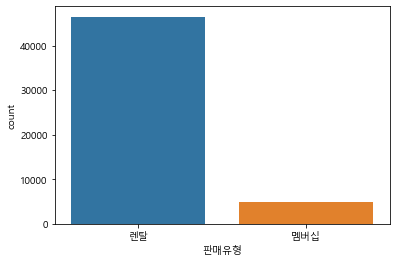

In [3]:
# 범주형 데이터 빈도수 확인
sns.countplot(data=df1, x='판매유형')

<AxesSubplot:xlabel='제품군', ylabel='count'>

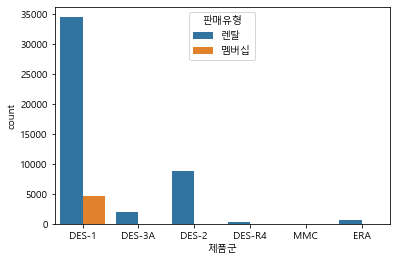

In [4]:
# 원하는 항목에 대해 데이터를 동시에 시각화 한자. (Overlay)
sns.countplot(data=df1, x='제품군', hue='판매유형')

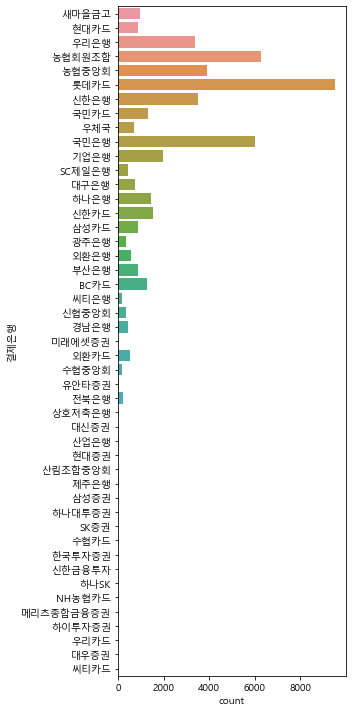

In [5]:
plt.figure(figsize=[5, 10]) # x축과 y축의 사이즈를 조절
sns.countplot(data=df1, y='결제은행') # 그래프의 축을 y로 출력
plt.tight_layout() # 그래프의 비율을 그래로 출력
plt.savefig('image1.png')

In [6]:
# 현대카드 고객들 중, 연체건수가 10건 이하인 고객들의 자료를 확인
# 어떤 제품군을 많이 쓰는지 시각적으로 확인
cond1 = (df1['결제은행']=='현대카드')
cond2 = (df1['연체건수']<=10)
df2 = df1.loc[cond1 & cond2]
# 위 3줄로 로직을 만들어서 밑에 셀처럼 실행시키면 간단하게 할 수 있음

<AxesSubplot:xlabel='제품군', ylabel='count'>

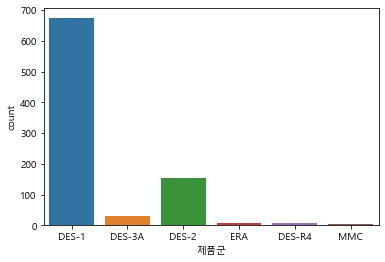

In [7]:
sns.countplot(data=df2, x='제품군')

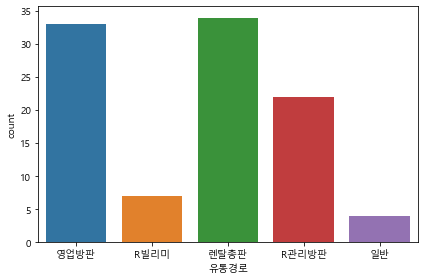

In [8]:
cond1 = (df1['판매유형']=='렌탈')
df3 = df1.loc[cond1].sort_values(by='월랜탈비용', ascending=False).head(100)

sns.countplot(data=df3, x='유통경로')

plt.tight_layout()
plt.savefig('image2.png')

In [9]:
df1['유통경로'].unique()

array(['서비스 방문', '홈쇼핑/방송', '렌탈재계약', '렌탈총판', '전자랜드', '홈플러스', '일반', '영업방판',
       '하이마트', '이마트', '홈쇼핑/인터넷', 'R빌리미', 'R유통사', 'R인터넷', 'R관리방판',
       'R농협인터넷몰', 'R농협', 'R법인', 'R렌탈운영', 'R법인그룹'], dtype=object)

유통경로를 입력하시오 : 하이마트


<AxesSubplot:xlabel='제품군', ylabel='count'>

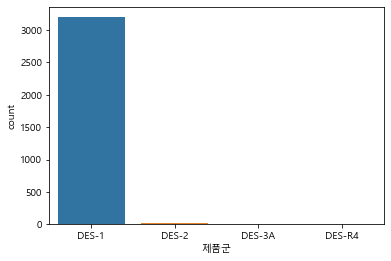

In [10]:
input_channel = input('유통경로를 입력하시오 : ')

cond1 = (df1['유통경로']== input_channel)
df4 = df1.loc[cond1]
sns.countplot(data=df4, x='제품군')

<AxesSubplot:xlabel='월랜탈비용', ylabel='Count'>

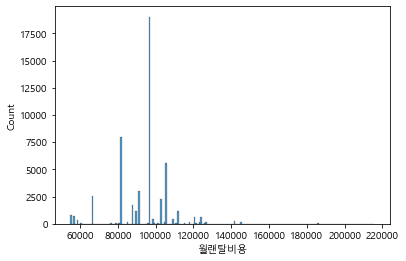

In [11]:
# 연속형 데이터 분포 확인
sns.histplot(data=df1, x='월랜탈비용')

<AxesSubplot:xlabel='월랜탈비용', ylabel='Count'>

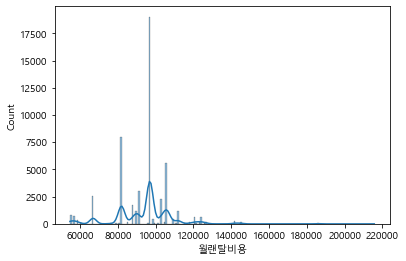

In [12]:
# Histogram + Kernal Density Estimator
sns.histplot(data=df1, x='월랜탈비용', kde=True)

<AxesSubplot:xlabel='월랜탈비용', ylabel='Count'>

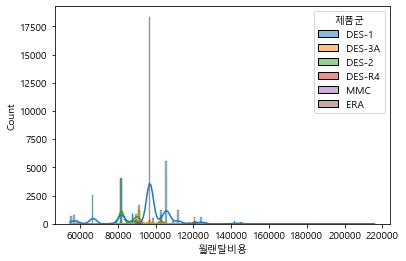

In [13]:
sns.histplot(data=df1, x='월랜탈비용', kde=True, hue='제품군')

<AxesSubplot:xlabel='월랜탈비용'>

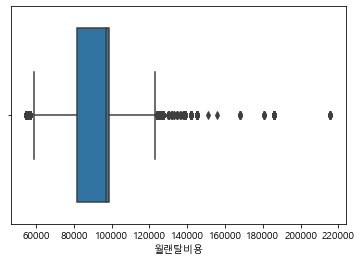

In [14]:
sns.boxplot(data=df1, x='월랜탈비용')

<AxesSubplot:xlabel='제품군', ylabel='연체건수'>

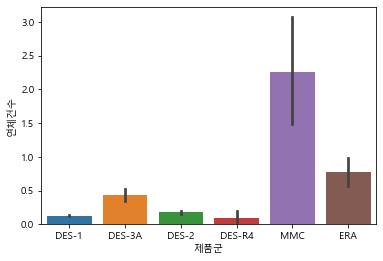

In [15]:
# 다변수 시각화
# 제품군에 따른 연체건수의 평균 바교
sns.barplot(data=df1 ,x='제품군', y='연체건수')
# 신뢰구간 (ci) : 모집단 평균이 들어있을 95%인 구간

<AxesSubplot:xlabel='제품군', ylabel='연체건수'>

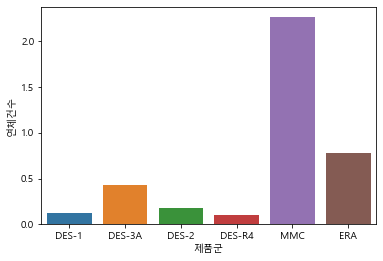

In [16]:
sns.barplot(data=df1, x='제품군', y='연체건수', ci=None)

<AxesSubplot:xlabel='제품군', ylabel='연체건수'>

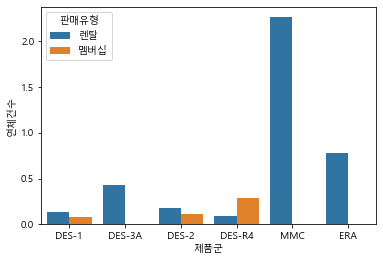

In [17]:
sns.barplot(data=df1, x='제품군', y='연체건수', ci=None, hue='판매유형')

<AxesSubplot:xlabel='제품군', ylabel='연체건수'>

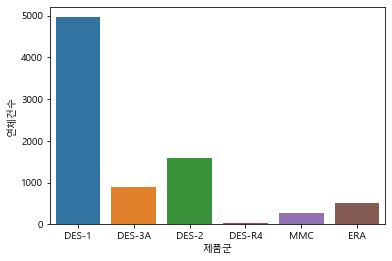

In [18]:
sns.barplot(data=df1, x='제품군', y='연체건수', estimator=sum, ci=None)

In [19]:
cond1 = (df1['결제은행']=='현대카드')
df1_hcard = df1.loc[cond1]

In [20]:
df1_hcard['연체건수'].mean()

0.0410958904109589

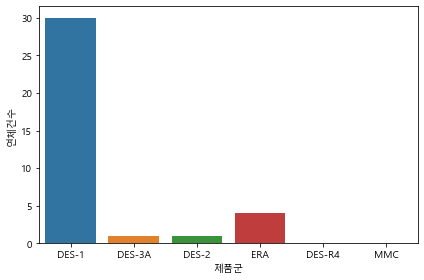

In [23]:
sns.barplot(data=df1_hcard, x='제품군', y='연체건수', 
            ci=None, estimator=sum)

plt.tight_layout()
plt.savefig('image4.png')

<AxesSubplot:xlabel='월랜탈비용', ylabel='신용등급'>

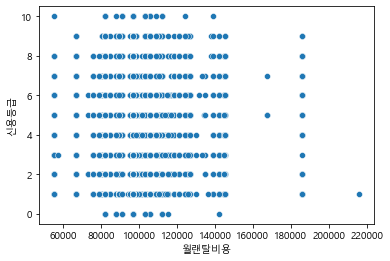

In [25]:
sns.scatterplot(data=df1, x='월랜탈비용', y='신용등급')

In [35]:
df1['datetime'] = pd.to_datetime(df1['계약일'])
df1['연도'] = df1['datetime'].dt.year
df1['월'] = df1['datetime'].dt.month
df1['요일'] = df1['datetime'].dt.day_name()

In [36]:
# 가장 오른쪽에 datetime, 연도, 월, 요일 열 생김
df1

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,datetime,연도,월,요일
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상,2014-10-20,2014,10,Monday
1,66755948,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2.0,현대카드,정상,2014-10-20,2014,10,Monday
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상,2014-10-20,2014,10,Monday
3,66423450,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5.0,농협회원조합,정상,2014-10-20,2014,10,Monday
4,66423204,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,해약확정,12,있음,8.0,농협회원조합,해약,2014-10-20,2014,10,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,66579515,NaN,프로모션,R관리방판,02-03-2015,60,무통장,DES-3A,96900,계약확정,0,없음,NaN,롯데카드,정상,2015-02-03,2015,2,Tuesday
51300,66799558,렌탈,일반,영업방판,02-03-2015,60,카드이체,DES-1,96900,해약확정,0,없음,8.0,롯데카드,해약,2015-02-03,2015,2,Tuesday
51301,66799197,렌탈,프로모션,홈쇼핑/방송,02-03-2015,39,무통장,ERA,120900,해약확정,0,없음,1.0,NaN,해약,2015-02-03,2015,2,Tuesday
51302,66792778,NaN,일반,렌탈총판,02-03-2015,60,카드이체,DES-1,96900,계약확정,0,없음,2.0,신한카드,정상,2015-02-03,2015,2,Tuesday


In [34]:
df1.pivot_table(index='연도', values='월랜탈비용', aggfunc='sum')

,월랜탈비용
연도,
2014,3515834919
2015,1306483536


<AxesSubplot:xlabel='datetime', ylabel='월랜탈비용'>

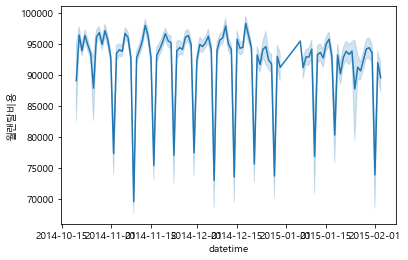

In [38]:
sns.lineplot(data=df1, x='datetime', y='월랜탈비용')
# 주말마다 매출액이 떨어져서 그래프가 확확 낮아짐

<AxesSubplot:xlabel='연도', ylabel='월랜탈비용'>

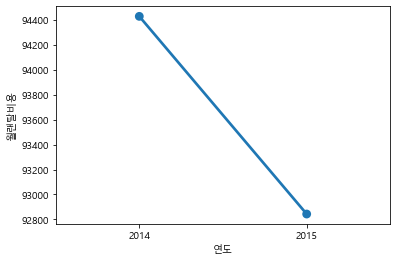

In [69]:
sns.pointplot(data=df1, x='연도', y='월랜탈비용', ci=None)

# 미션3

In [ ]:
cond1 = (df1['연도']==2015)
cond2 = (df1['결제은행']=='롯데카드')

df1_lcard = df1.loc[cond1 & cond2]

In [66]:
df1_lcard['연체건수'].mean()

0.018580276322058123

In [67]:
cond1 = (df1['월랜탈비용']>=100000)
df1_lcard.loc[cond1].shape

(611, 19)

In [68]:
df1_lcard.pivot_table(index='제품군', values='월랜탈비용', 
                      aggfunc='sum').to_excel('result_2015.xlsx')

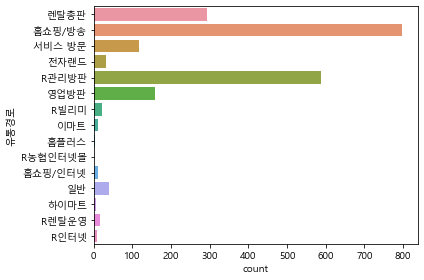

In [71]:
sns.countplot(data=df1_lcard, y='유통경로')
plt.tight_layout()
plt.savefig('image5.png')

<AxesSubplot:xlabel='판매유형', ylabel='월랜탈비용'>

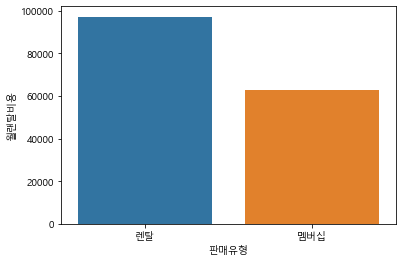

In [72]:
sns.barplot(data=df1, x='판매유형', y='월랜탈비용', ci=None)

In [73]:
import scipy.stats as stats